In [27]:
import mne
import pickle
from brainflow import BoardShim
from brainflow import BoardShim
from speller_config import *
from mne import create_info
import matplotlib.pyplot as plt
import numpy as np
from mne import time_frequency

Opening raw data file E:\Thesis\HybridSpeller\three_flicker\record\sunsun_20230420\2C.fif...
    Range : 0 ... 1501 =      0.000 ...     6.004 secs
Ready.
Reading 0 ... 1501  =      0.000 ...     6.004 secs...


C:\Users\Sunsun\AppData\Local\Temp\ipykernel_15540\1438509060.py:3: RuntimeWarning: This filename (E:\Thesis\HybridSpeller\three_flicker\record\sunsun_20230420\2C.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw =  mne.io.read_raw_fif(fname,  preload = True)


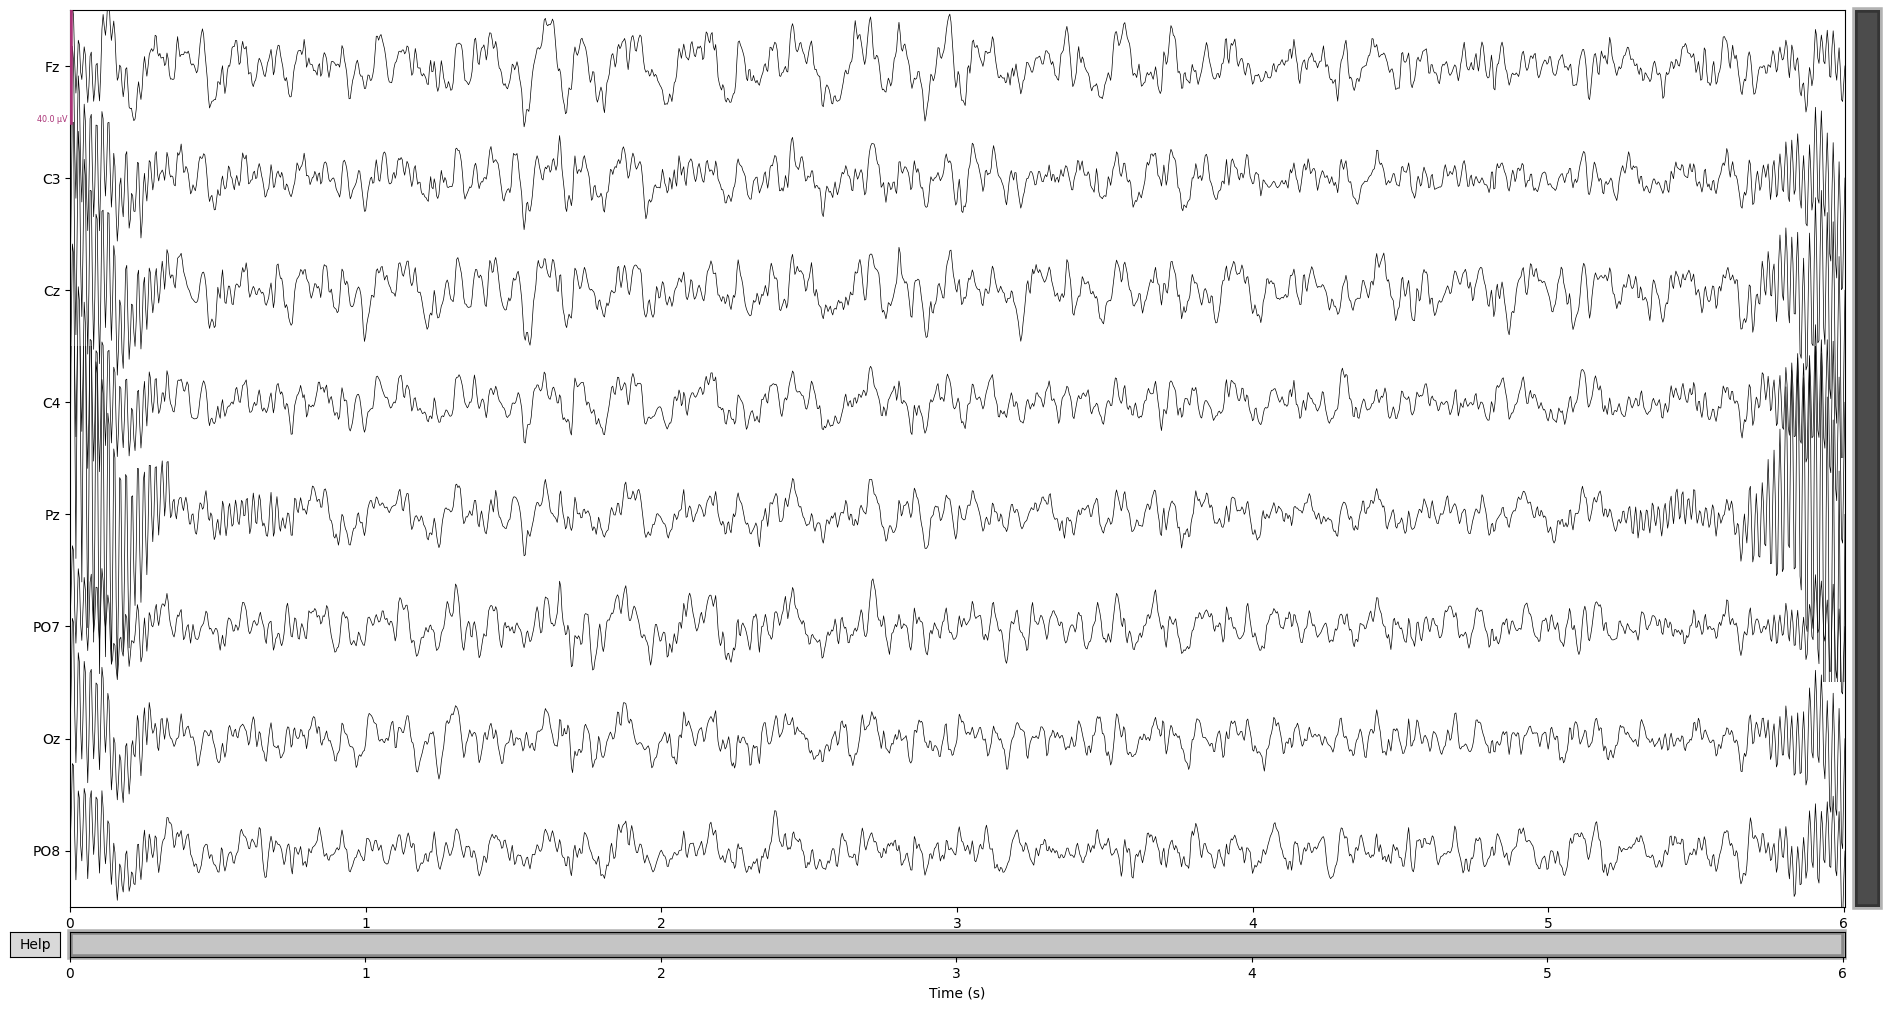

Creating RawArray with float64 data, n_channels=8, n_times=1000
    Range : 0 ... 999 =      0.000 ...     3.996 secs
Ready.


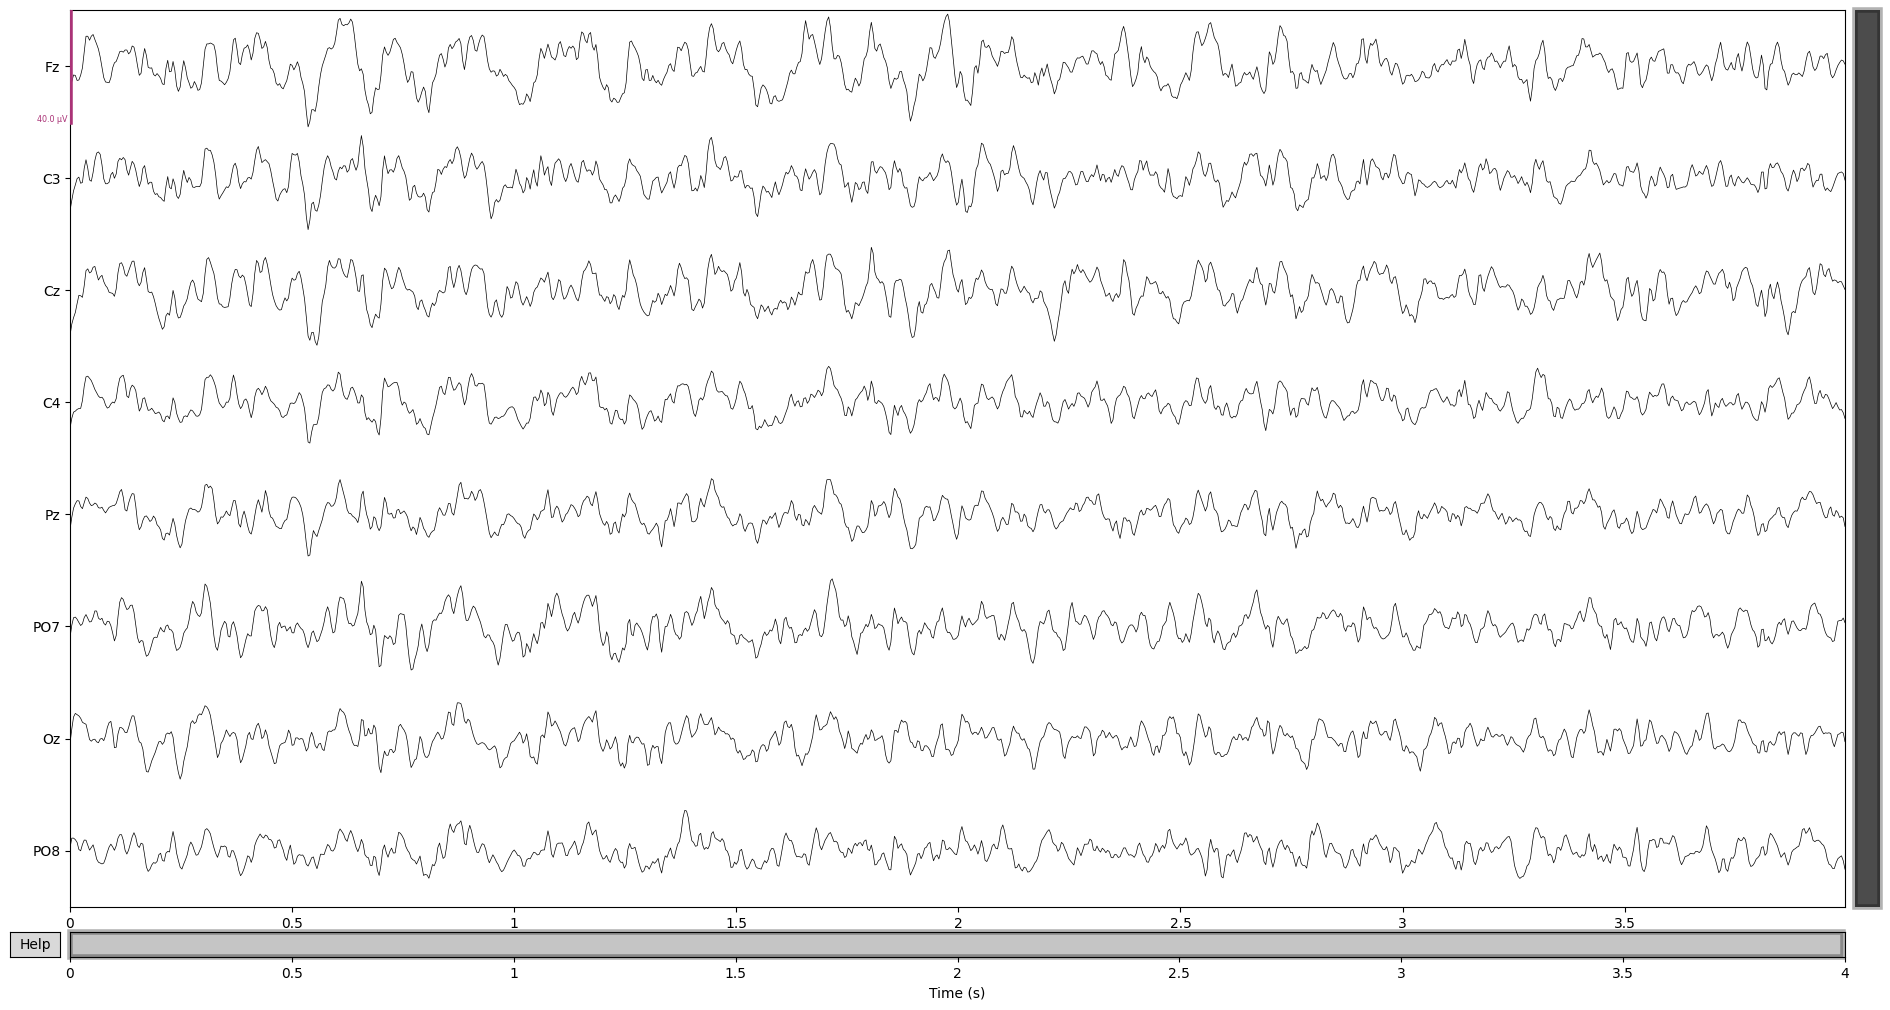

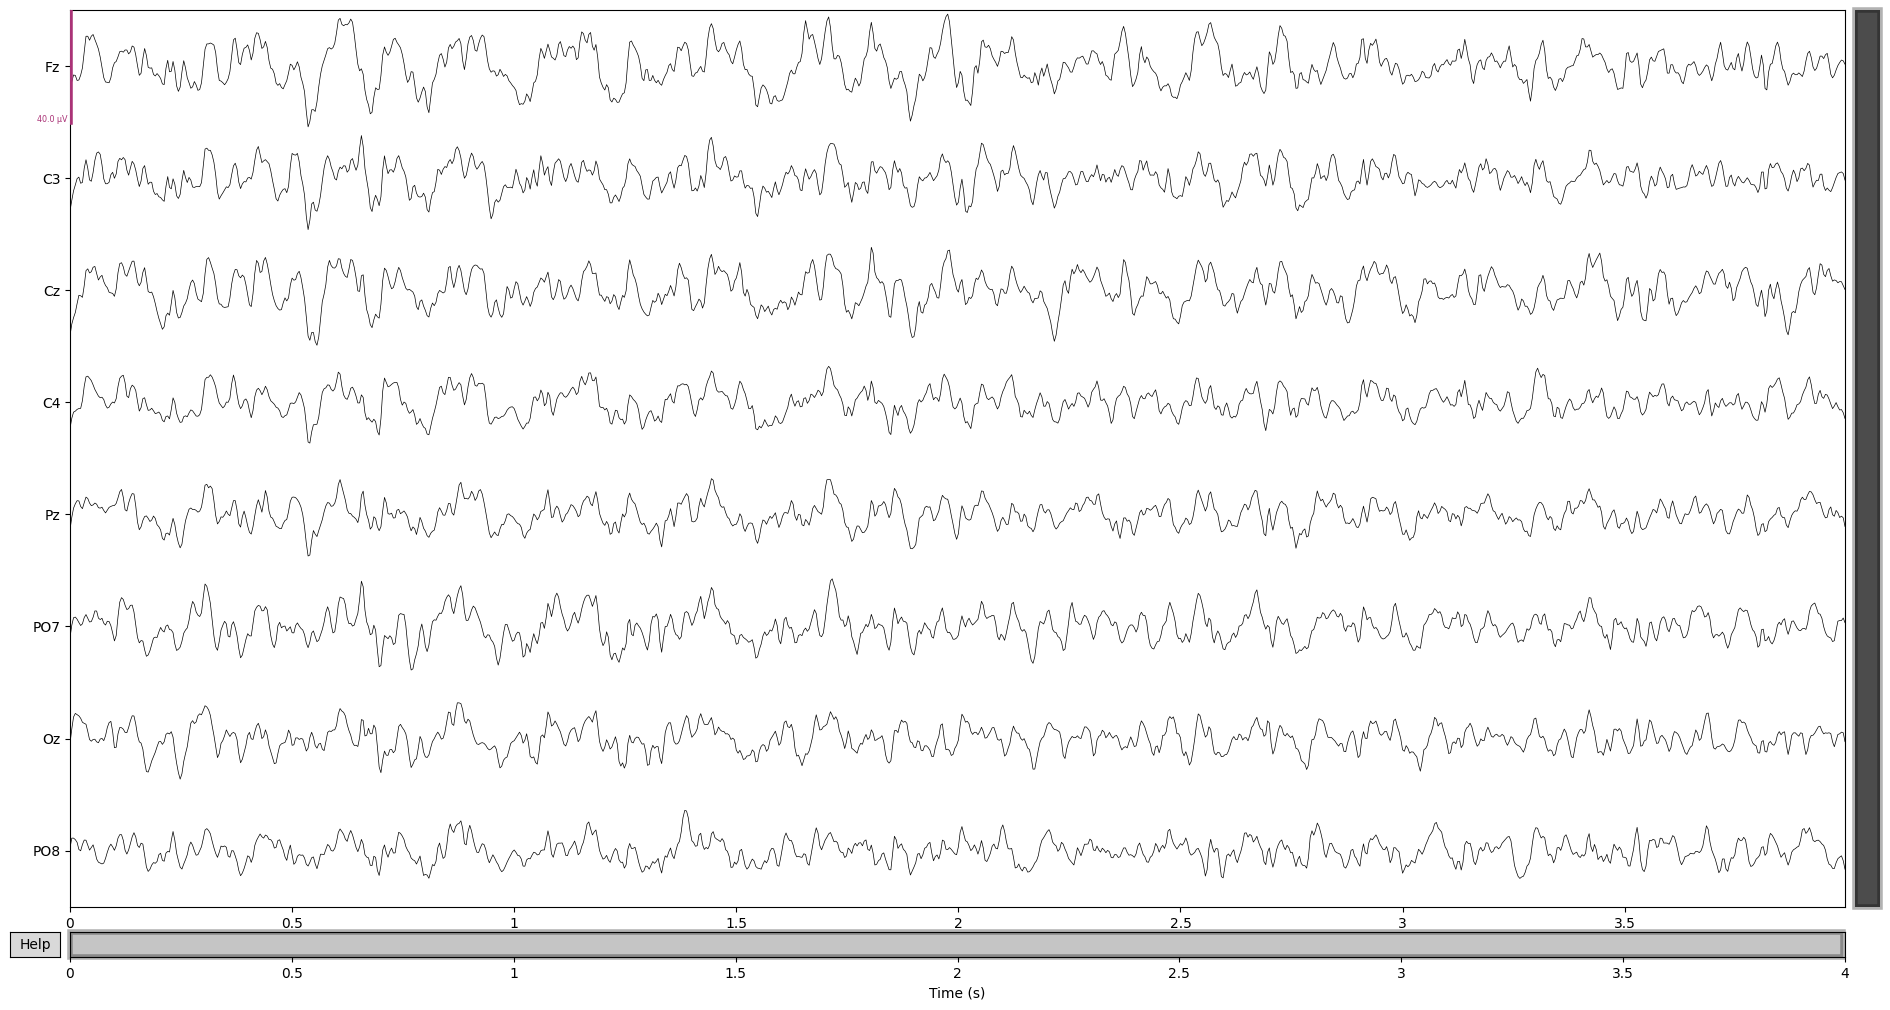

In [47]:
fname = r'E:\Thesis\HybridSpeller\three_flicker\record\sunsun_20230420\2C.fif'

raw =  mne.io.read_raw_fif(fname,  preload = True)
raw.plot()
data = raw.get_data()[:8,250:1250]
new_raw = mne.io.RawArray(data,raw.info)
new_raw.plot()

In [48]:
stft_data = []
data = np.expand_dims(data,axis=0)
print(data.shape)
for i in range(data.shape[0]):
    stft = time_frequency.stft(data[i], wsize=252, verbose=False); 
    stft_data.append(np.expand_dims(stft, axis=0))
stft_data = np.concatenate(stft_data, axis=0)
stft_data.shape

(1, 8, 1000)


(1, 8, 127, 8)

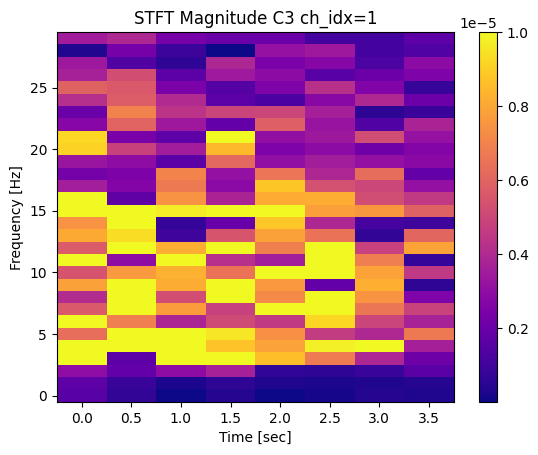

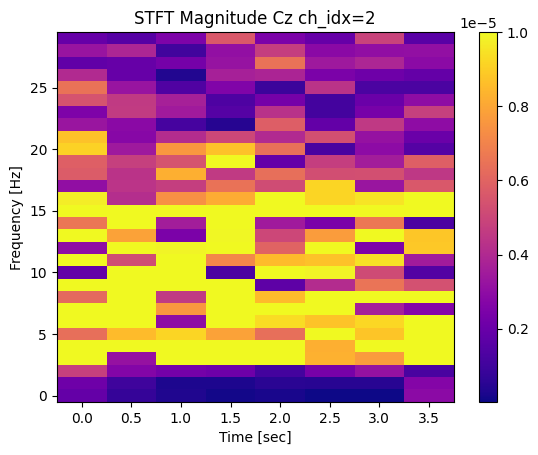

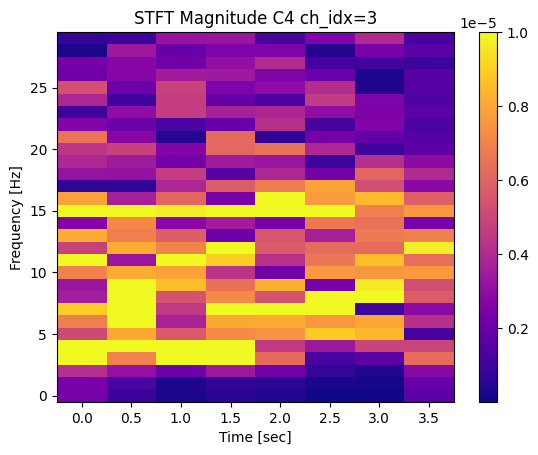

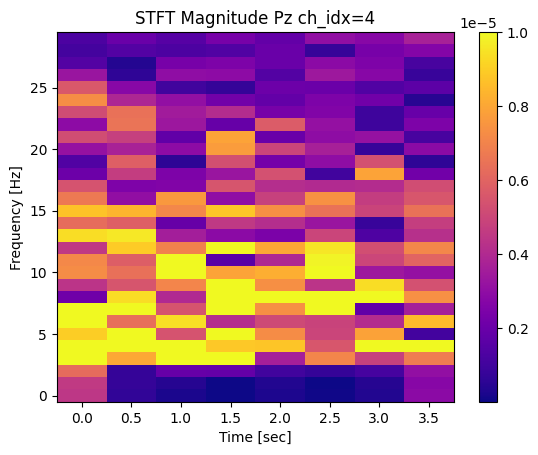

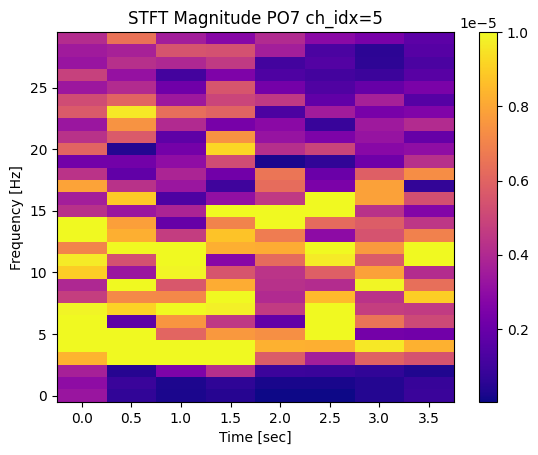

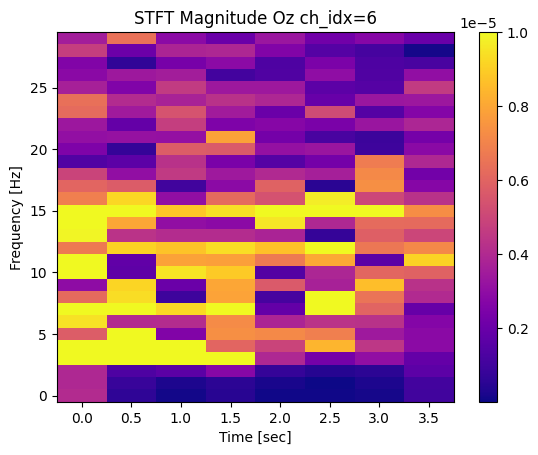

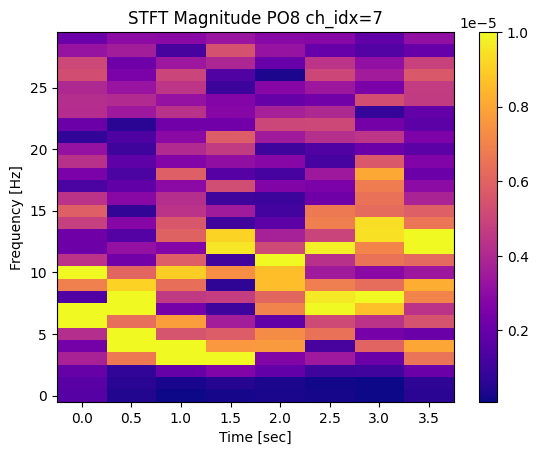

In [49]:
for ch_idx in range(1,8):
    stft = stft_data[0,ch_idx]
    stft = stft[:30,:]
    c = plt.pcolormesh(np.arange(0,(stft.shape[1]) //2,0.5), range(stft.shape[0]), np.abs(stft), cmap='plasma', vmax=10e-6)
    plt.colorbar(c)
    plt.title(f'STFT Magnitude {raw.ch_names[ch_idx]} {ch_idx=}')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.show()

In [56]:
from glob import glob
import os
files = glob(r'E:\Thesis\HybridSpeller\three_flicker\record\sunsun_20230420\*.fif')
y = []
X = []
for fpath in files:
    _,filename = os.path.split(fpath)
    y.append(filename[1])

    raw =  mne.io.read_raw_fif(fpath,  preload = True)
    x = raw.get_data()[:8,250:1250]
    X.append(np.expand_dims(x,axis=0))

y = np.array(y)
X = np.concatenate(X)

print(X.shape, y.shape)

# fname = r'E:\Thesis\HybridSpeller\three_flicker\record\sunsun_20230420\2C.fif'

# raw =  mne.io.read_raw_fif(fname,  preload = True)
# raw.plot()
# data = raw.get_data()[:8,250:1250]
# new_raw = mne.io.RawArray(data,raw.info)
# new_raw.plot()

Opening raw data file E:\Thesis\HybridSpeller\three_flicker\record\sunsun_20230420\0A.fif...
    Range : 0 ... 1503 =      0.000 ...     6.012 secs
Ready.
Reading 0 ... 1503  =      0.000 ...     6.012 secs...
Opening raw data file E:\Thesis\HybridSpeller\three_flicker\record\sunsun_20230420\0B.fif...
    Range : 0 ... 1500 =      0.000 ...     6.000 secs
Ready.
Reading 0 ... 1500  =      0.000 ...     6.000 secs...
Opening raw data file E:\Thesis\HybridSpeller\three_flicker\record\sunsun_20230420\0C.fif...
    Range : 0 ... 1500 =      0.000 ...     6.000 secs
Ready.
Reading 0 ... 1500  =      0.000 ...     6.000 secs...
Opening raw data file E:\Thesis\HybridSpeller\three_flicker\record\sunsun_20230420\1A.fif...
    Range : 0 ... 1502 =      0.000 ...     6.008 secs
Ready.
Reading 0 ... 1502  =      0.000 ...     6.008 secs...
Opening raw data file E:\Thesis\HybridSpeller\three_flicker\record\sunsun_20230420\1B.fif...
    Range : 0 ... 1500 =      0.000 ...     6.000 secs
Ready.
Readi

C:\Users\Sunsun\AppData\Local\Temp\ipykernel_15540\836356367.py:10: RuntimeWarning: This filename (E:\Thesis\HybridSpeller\three_flicker\record\sunsun_20230420\0A.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw =  mne.io.read_raw_fif(fpath,  preload = True)
C:\Users\Sunsun\AppData\Local\Temp\ipykernel_15540\836356367.py:10: RuntimeWarning: This filename (E:\Thesis\HybridSpeller\three_flicker\record\sunsun_20230420\0B.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw =  mne.io.read_raw_fif(fpath,  preload = True)
C:\Users\Sunsun\AppData\Local\Temp\ipykernel_15540\836356367.py:10: RuntimeWarning: This filename (E:\Th

In [58]:
print(X.shape, y.shape)
loaded_model = pickle.load(open(r"E:\Thesis\HybridSpeller\three_flicker\TRCA_model.sav", 'rb'))

(15, 8, 1000) (15,)


In [64]:
pred = loaded_model.predict(X)

In [65]:
pred

array([1, 1, 1, 1, 1, 2, 1, 3, 2, 1, 2, 2, 1, 1, 1], dtype=int64)

In [61]:
from numpy import ndarray
import numpy as np
from scipy.sparse import vstack, identity, spmatrix
from typing import Optional, cast, Union
from scipy.linalg import eigh
from scipy.sparse.linalg import eigsh
from scipy.stats import pearsonr
from sklearn.base import BaseEstimator, ClassifierMixin, TransformerMixin
from joblib import Parallel, delayed
from functools import partial



def _ged_wong(
    Z: ndarray,
    D: Optional[ndarray] = None,
    P: Optional[ndarray] = None,
    n_components=1,
    method="type1",
):
    if method != "type1" and method != "type2":
        raise ValueError("not supported method type")

    A = Z
    if D is not None:
        A = D.T @ A
    if P is not None:
        A = P.T @ A
    A = A.T @ A
    if method == "type1":
        B = Z
        if D is not None:
            B = D.T @ Z
        B = B.T @ B
        if isinstance(A, spmatrix) or isinstance(B, spmatrix):
            D, W = eigsh(A, k=n_components, M=B)
        else:
            D, W = eigh(A, B)
    elif method == "type2":
        if isinstance(A, spmatrix):
            D, W = eigsh(A, k=n_components)
        else:
            D, W = eigh(A)

    D_exist = cast(ndarray, D)
    ind = np.argsort(D_exist)[::-1]
    D_exist, W = D_exist[ind], W[:, ind]
    return D_exist[:n_components], W[:, :n_components]


def _trca_kernel(X: ndarray):
    """TRCA.
    X: (n_trials, n_channels, n_samples)
    """
    X = np.reshape(X, (-1, *X.shape[-2:]))
    M, C, N = X.shape
    n_components = C
    P = vstack([identity(N) for _ in range(M)])
    P = P @ P.T
    # P = abs(P @ P.T)
    Z = np.hstack(X).T  # type: ignore
    _, U = _ged_wong(Z, None, P, n_components=n_components)  # U for X
    return U


def _trca_feature(
    X: ndarray,
    templates: ndarray,
    Us: ndarray,
    n_components: int = 1,
    ensemble: bool = True,
):
    rhos = []
    if not ensemble:
        for Xk, U in zip(templates, Us):
            a = U[:, :n_components].T @ X
            b = U[:, :n_components].T @ Xk
            a = np.reshape(a, (-1))
            b = np.reshape(b, (-1))
            rhos.append(pearsonr(a, b)[0])
    else:
        U = Us[:, :, :n_components]
        U = np.concatenate(U, axis=-1)
        for Xk in templates:
            a = U.T @ X
            b = U.T @ Xk
            a = np.reshape(a, (-1))
            b = np.reshape(b, (-1))
            rhos.append(pearsonr(a, b)[0])
    return rhos


class TRCA(BaseEstimator, TransformerMixin, ClassifierMixin):
    def __init__(
        self, n_components: int = 1, ensemble: bool = True, n_jobs: Optional[int] = None
    ):
        self.n_components = n_components
        self.ensemble = ensemble
        self.n_jobs = n_jobs

    def fit(self, X: ndarray, y: ndarray, Yf: Optional[ndarray] = None):
        self.classes_ = np.unique(y)
        X = np.reshape(X, (-1, *X.shape[-2:]))
        X = X - np.mean(X, axis=-1, keepdims=True)
        self.templates_ = np.stack(
            [np.mean(X[y == label], axis=0) for label in self.classes_]
        )

        self.Us_ = np.stack([_trca_kernel(X[y == label]) for label in self.classes_])
        return self

    def transform(self, X: ndarray):
        X = np.reshape(X, (-1, *X.shape[-2:]))
        X = X - np.mean(X, axis=-1, keepdims=True)
        n_components = self.n_components
        templates = self.templates_
        Us = self.Us_
        ensemble = self.ensemble
        rhos = Parallel(n_jobs=self.n_jobs)(
            delayed(
                partial(
                    _trca_feature, Us=Us, n_components=n_components, ensemble=ensemble
                )
            )(a, templates)
            for a in X
        )
        rhos = np.stack(rhos)
        return rhos

    def predict(self, X: ndarray):
        feat = self.transform(X)
        labels = self.classes_[np.argmax(feat, axis=-1)]
        return labels


def generate_cca_references(
    freqs,
    srate,
    T,
    phases: Optional[Union[ndarray, int, float]] = None,
    n_harmonics: int = 1,
):
    if isinstance(freqs, int) or isinstance(freqs, float):
        freqs = [freqs]
    freqs = np.array(freqs)[:, np.newaxis]
    if phases is None:
        phases = 0
    if isinstance(phases, int) or isinstance(phases, float):
        phases = np.array([phases])
    phases = np.array(phases)[:, np.newaxis]
    t = np.linspace(0, T, int(T * srate))

    Yf = []
    for i in range(n_harmonics):
        Yf.append(
            np.stack(
                [
                    np.sin(2 * np.pi * (i + 1) * freqs * t + np.pi * phases),
                    np.cos(2 * np.pi * (i + 1) * freqs * t + np.pi * phases),
                ],
                axis=1,
            )
        )
    Yf = np.concatenate(Yf, axis=1)
    return Yf

In [39]:
loaded_model = pickle.load(open(r"E:\Thesis\HybridSpeller\three_flicker\TRCA_model.sav", 'rb'))


In [41]:
pred = loaded_model.predict(data)
print(pred)

[1]


In [26]:
data.shape

(8, 750)

In [125]:
pickle_filename = r'E:\Thesis\HybridSpeller\three_flicker\record\sunsun_20230420\4C.pickle'

with open(pickle_filename, 'rb') as handle:
    pickle_data = pickle.load(handle)

In [126]:
marker_channel = BoardShim.get_marker_channel(BOARD_ID)
eeg_channels = BoardShim.get_eeg_channels(BOARD_ID)
pickle_data[eeg_channels] = pickle_data[eeg_channels] / 1e6
pickle_data = pickle_data[eeg_channels + [marker_channel]]

# for i in range(9):
#     plt.plot(pickle_data[i,-500:])
#     plt.show()

In [127]:
_CHANNELS = ['FZ', 'C3', 'CZ', 'C4', 'PZ', 'PO7', 'OZ', 'PO8']
ch_names = [ch_name.upper() for ch_name in _CHANNELS]
ch_names = ch_names + ['STIM']
ch_types = ["eeg"] * 9
ch_types[-1] = "stim"

info = create_info(ch_names=ch_names, ch_types=ch_types, sfreq=250)

Creating RawArray with float64 data, n_channels=9, n_times=1503
    Range : 0 ... 1502 =      0.000 ...     6.008 secs
Ready.
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1651 samples (6.604 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 77 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower 

C:\Users\Sunsun\AppData\Local\Temp\ipykernel_15540\2196787357.py:2: RuntimeWarning: filter_length (1651) is longer than the signal (1503), distortion is likely. Reduce filter length or filter a longer signal.
  raw_pickle.notch_filter([50])
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | ela

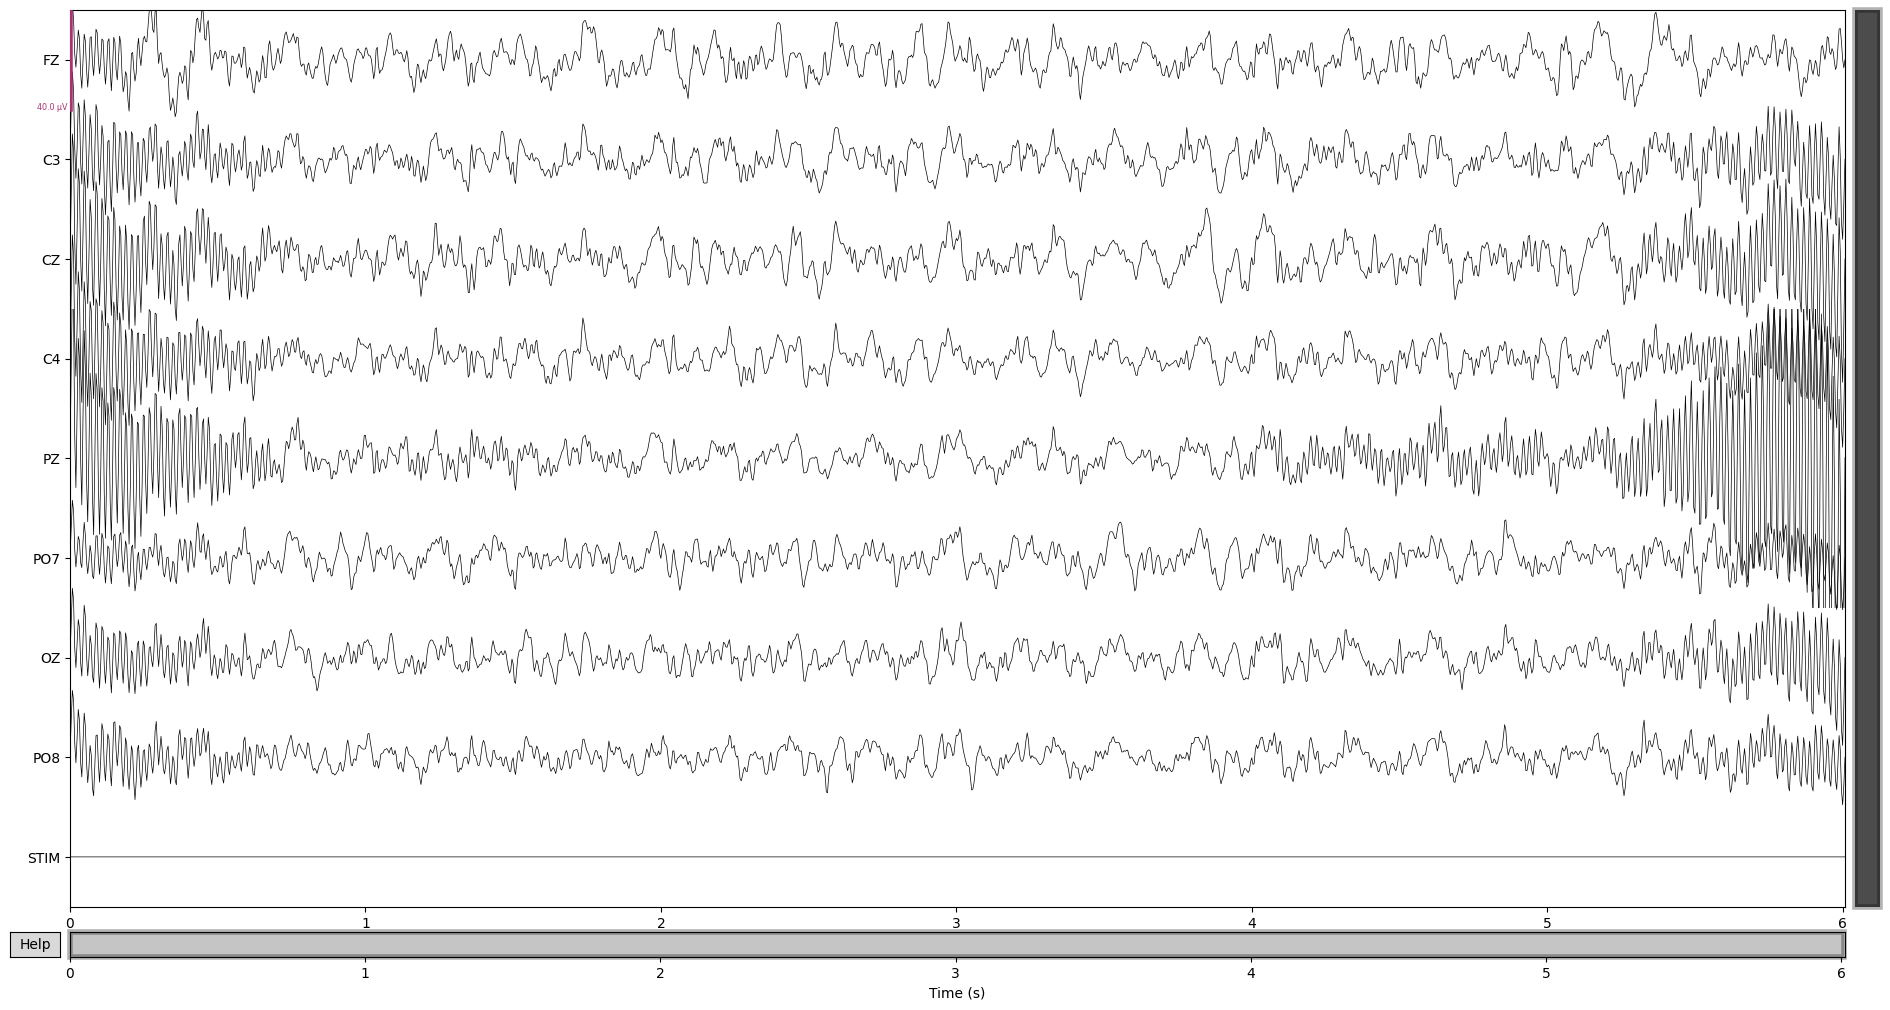

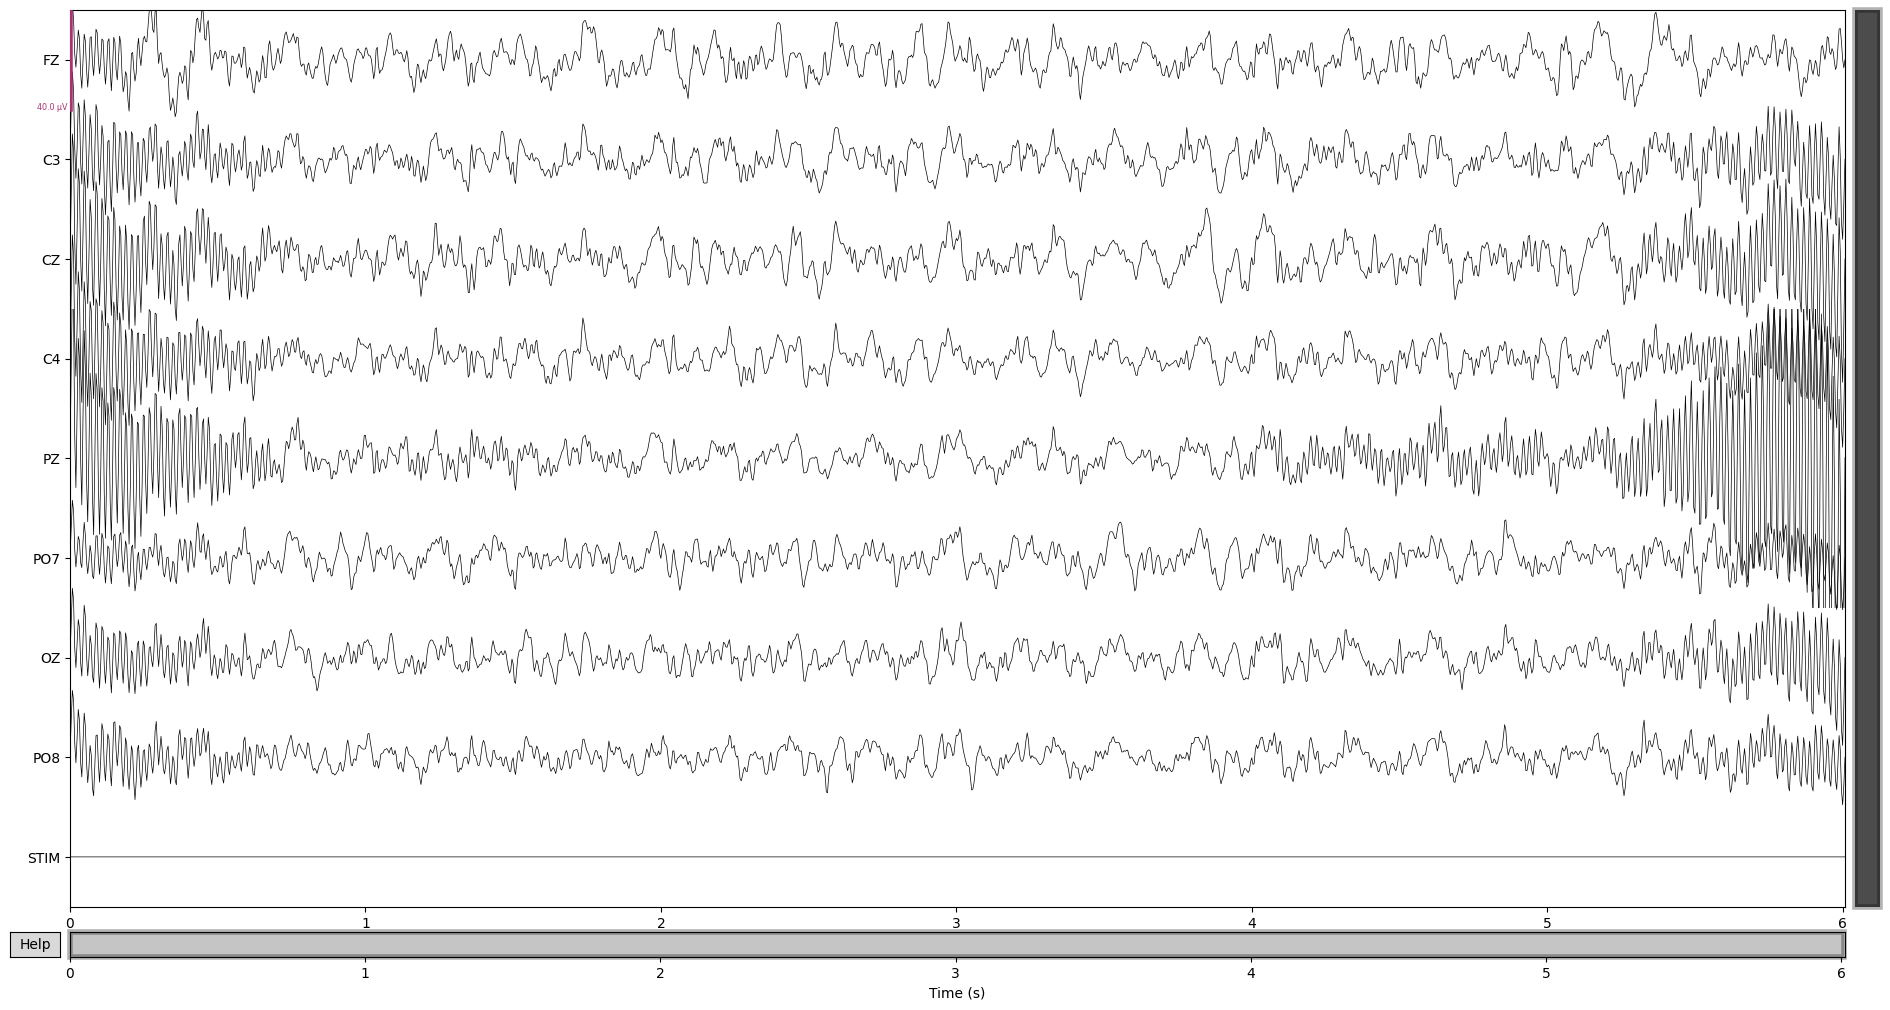

In [128]:
raw_pickle = mne.io.RawArray(pickle_data, info=info)
raw_pickle.notch_filter([50])
raw_pickle.filter(4,77)
raw_pickle.plot()

In [129]:
data = raw_pickle.get_data()[:8,250:1250]

In [130]:
pred = loaded_model.predict(data)
print(pred)

[1]
